In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
(train_data, train_labels), _ = imdb.load_data(num_words=10000)  #num_words=10000 means keep top 10,000 most frequently occurring words

In [3]:
train_data[4][:10]

[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637]

In [4]:
import numpy as np

In [5]:
def vectorize_sequences(sequences, dimension=10000):  # no word index will exceed 10,000 because of our restriction
    results = np.zeros((len(sequences), dimension))   # creates an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

train_data = vectorize_sequences(train_data)

We will start the model with relatively few layers and parameters, and then increase the size of the layers or add new layers until it starts to overfit.

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_of_original_model = model.fit(train_data, train_labels, epochs=20,
          batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.7046 - loss: 0.5948 - val_accuracy: 0.8508 - val_loss: 0.4017
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8929 - loss: 0.3358 - val_accuracy: 0.8782 - val_loss: 0.3201
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9195 - loss: 0.2447 - val_accuracy: 0.8913 - val_loss: 0.2829
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9353 - loss: 0.1972 - val_accuracy: 0.8918 - val_loss: 0.2768
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9488 - loss: 0.1649 - val_accuracy: 0.8862 - val_loss: 0.2869
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9598 - loss: 0.1334 - val_accuracy: 0.8861 - val_loss: 0.2908
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9625 - loss: 0.1217 - val_accuracy: 0.8838 - val_loss: 0.3049
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9741 - loss: 0.0969 - val_accuracy: 0.8823 - v

Now lets replace it with a smaller model. then compare them on the loss curve

In [8]:
model = keras.Sequential([
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_of_smaller_model = model.fit(train_data, train_labels, epochs=20,
          batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.5730 - loss: 0.6634 - val_accuracy: 0.7959 - val_loss: 0.5611
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8405 - loss: 0.5226 - val_accuracy: 0.8672 - val_loss: 0.4592
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8867 - loss: 0.4148 - val_accuracy: 0.8789 - val_loss: 0.3885
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9065 - loss: 0.3383 - val_accuracy: 0.8811 - val_loss: 0.3412
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9225 - loss: 0.2796 - val_accuracy: 0.8862 - val_loss: 0.3089
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9285 - loss: 0.2430 - val_accuracy: 0.8886 - val_loss: 0.2939
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9345 - loss: 0.2125 - val_accuracy: 0.8889 - val_loss: 0.2826
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9427 - loss: 0.1899 - val_accuracy: 0.8896 - v

In [9]:
import matplotlib.pyplot as plt

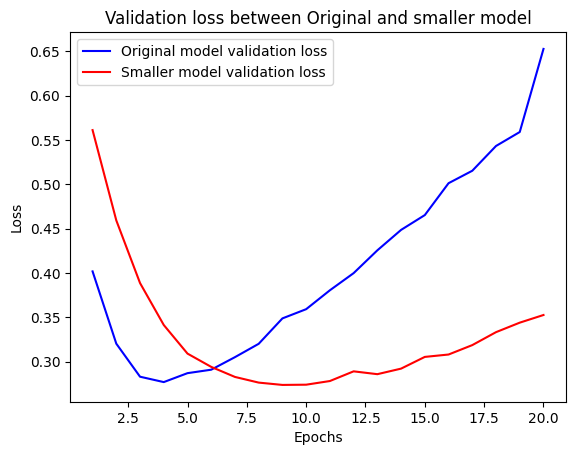

In [10]:
val_loss_original_model = history_of_original_model.history['val_loss']
val_loss_smaller_model = history_of_smaller_model.history['val_loss']
epoch = range(1, 21)
plt.plot(epoch, val_loss_original_model, 'b', label='Original model validation loss')
plt.plot(epoch, val_loss_smaller_model, 'r', label='Smaller model validation loss')
plt.title('Validation loss between Original and smaller model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

It can be seen that the smaller model starts overfitting later than the original model, at around the 6th epoch, while the original model starts at around 4. The perfomace also degrades slowly for the smaller model once it starts overfitting.
Now lets train a model with larger capacity than the original:

In [11]:
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_of_larger_model = model.fit(train_data, train_labels, epochs=20,
          batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 390ms/step - accuracy: 0.6186 - loss: 0.6442 - val_accuracy: 0.8655 - val_loss: 0.3377
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 360ms/step - accuracy: 0.8619 - loss: 0.3371 - val_accuracy: 0.8221 - val_loss: 0.4016
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 337ms/step - accuracy: 0.9116 - loss: 0.2315 - val_accuracy: 0.8878 - val_loss: 0.2729
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 404ms/step - accuracy: 0.9326 - loss: 0.1777 - val_accuracy: 0.8810 - val_loss: 0.3068
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 311ms/step - accuracy: 0.9406 - loss: 0.1521 - val_accuracy: 0.8853 - val_loss: 0.3011
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 313ms/step - accuracy: 0.9610 - loss: 0.1076 - val_accuracy: 0.8883 - val_loss: 0.3125
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 353ms/step - accuracy: 0.9814 - loss: 0.0611 - val_accuracy: 0.8845 - val_loss: 0.3407
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 333ms/step - accuracy: 0.9888 - loss: 0.0444 - val_accur

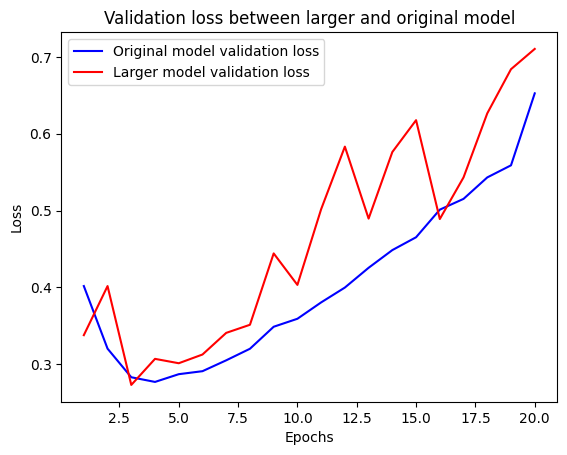

In [12]:
val_loss_original_model = history_of_original_model.history['val_loss']
val_loss_larger_model = history_of_larger_model.history['val_loss']
epoch = range(1, 21)
plt.plot(epoch, val_loss_original_model, 'b', label='Original model validation loss')
plt.plot(epoch, val_loss_larger_model, 'r', label='Larger model validation loss')
plt.title('Validation loss between larger and original model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The larger model starts overfitting almost immediately and much more severly. The validation loss is also very unstable (noisy).
The more capacity the model has, the more quickly it can model the training data, but also it is more susceptible to overfitting.

Another regularization technique is the addition of weight regularization. let's explore it.

## Weight Regularization
This involves adding to the loss function of the model a cost associated with having large weights in order to put constraints on the complexity of the model by forcing its weight to take only small values. Remember that simpler models are less likely to overfit

In [13]:
from tensorflow.keras import regularizers

In [14]:
model = keras.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002),
                 activation='relu'),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002),
                 activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_l2_reg = model.fit(train_data, train_labels,
                           epochs = 20, batch_size=512,
                           validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.6826 - loss: 0.7106 - val_accuracy: 0.8525 - val_loss: 0.5142
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8791 - loss: 0.4618 - val_accuracy: 0.8836 - val_loss: 0.4108
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9067 - loss: 0.3655 - val_accuracy: 0.8855 - val_loss: 0.3788
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9194 - loss: 0.3196 - val_accuracy: 0.8870 - val_loss: 0.3658
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9317 - loss: 0.2924 - val_accuracy: 0.8745 - val_loss: 0.3810
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9346 - loss: 0.2748 - val_accuracy: 0.8824 - val_loss: 0.3696
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9424 - loss: 0.2572 - val_accuracy: 0.8839 - val_loss: 0.3675
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9480 - loss: 0.2455 - val_accuracy: 0.8833 - v

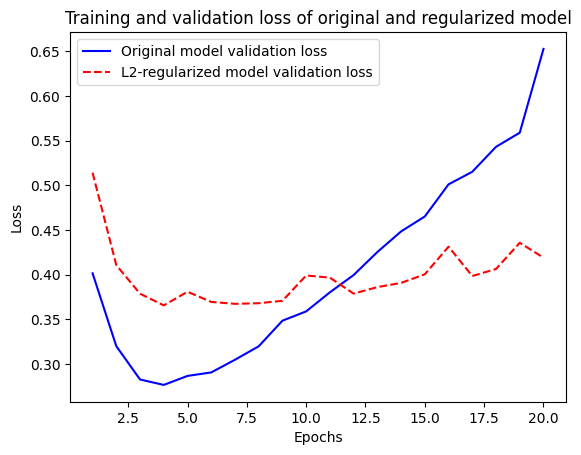

In [15]:
val_loss = history_l2_reg.history['val_loss']
val_loss_original_model = history_of_original_model.history['val_loss']
epoch = range(1, 21)
plt.plot(epoch, val_loss_original_model, 'b', label='Original model validation loss')
plt.plot(epoch, val_loss, 'r--', label='L2-regularized model validation loss')
plt.title('Training and validation loss of original and regularized model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

From the figure above, you can see the impact of the regularization penelty. The model with regularization is much more resistant to overfitting than the original model. Its starts overfitting late and continues slowly compares to the original model. That is even with the same number of  parameters.

This is the power of regularization

But adding weight regularization is not very effective for larger models, it is best suited for smaller deep learning models.
In large Models, a different regularization technique is preffered: Dropout !

### Adding Dropout
It consist of randomly dropping out (setting to zero) a number of output features of a layer during training.
The Idea is that introducing noise in the output values of a layer can break up happenstance patterns that are not significant, which the model will start memorizing if no noise is present. This prevents overfitting.

Lets implement it and view it against the original model once again in the loss curve:

In [16]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense( 1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_of_dropout = model.fit(train_data, train_labels,
                            epochs = 20, batch_size=512,
                            validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.5901 - loss: 0.6594 - val_accuracy: 0.8443 - val_loss: 0.5330
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7567 - loss: 0.5348 - val_accuracy: 0.8669 - val_loss: 0.4227
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8135 - loss: 0.4480 - val_accuracy: 0.8800 - val_loss: 0.3536
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8470 - loss: 0.3884 - val_accuracy: 0.8841 - val_loss: 0.3217
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8781 - loss: 0.3454 - val_accuracy: 0.8877 - val_loss: 0.2982
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.8980 - loss: 0.3032 - val_accuracy: 0.8906 - val_loss: 0.2841
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9136 - loss: 0.2603 - val_accuracy: 0.8897 - val_loss: 0.2843
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9258 - loss: 0.2420 - val_accuracy: 0.8895 - v

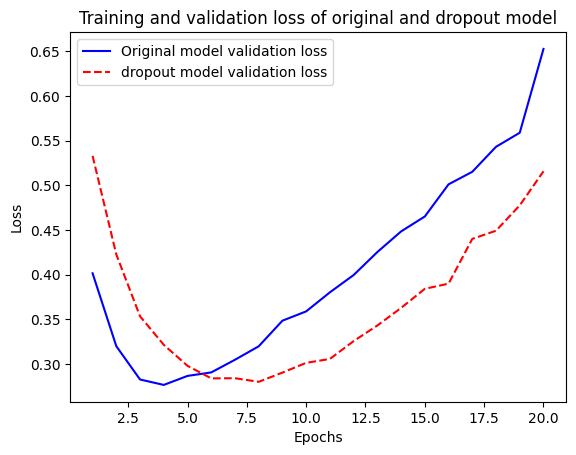

In [18]:
dropout_loss = history_of_dropout.history['val_loss']
val_loss_original_model = history_of_original_model.history['val_loss']
epoch = range(1, 21)
plt.plot(epoch, val_loss_original_model, 'b', label='Original model validation loss')
plt.plot(epoch, dropout_loss, 'r--', label='dropout model validation loss')
plt.title('Training and validation loss of original and dropout model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The dopout model stats overfitting later than the original model. furthermore, the lowest validation point reached has been improved compare to the model with regularized weight, which is also a clear improvement.